# LEAD SCORING CASE STUDY (TEAM 6 SEPT 2022 MODULE EXAM)

### PROBLEM STATEMENT

An education company named X Education sells online courses to our industry professionals.
many professionals who are interested in the courses land on their website for courses.

The company is using social Media marketing on various websites and search engines like google
once the people land on websites, they might get intrested and browse courses or fill up a 
form for the course or watch videos.
1. Important to know that these people are classified as leads as they fill up a form 
providing their email address or phone number. 
Moreover, the company also gets leads through past referrals
2. Important to know that once the they get a lead. sales team contacts them.
3. Important to know that Thru this process, some of the leads get converted while most do 
not. TYPICAL LEAD CONVERSION RATE IS ABOUT 30%.

X Education has now hired you!!!
They have given you a task.
1. SELECT THE MOST PROMISING LEADS. i.e. the leads that are most likely to convert into paying 
customers.
2. The company requires a model. wherein you need to assign a leadscore to each of the leads
such that the customers with higher lead socre have a higher conversion chance and the
customers with lower lead score havd a lower conversion chance.
3. The CEO, in particular has given a target lead conversion rate to be around 80%.

## GOALS OF THE CASE STUDY

1. Build a LOGISTIC REGRESSION MODEL to assign a lead score between 0 and 100 to each of the 
leads which can be used by the company to target potential sales.
2. higher the score would mean that the lead is hot.
hot here means the lead is most likely to convert, whereas a lower score would mean that
the lead is cold and will most likely skip.


In [1]:
# importing libraries and filtering out the warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


### Understanding dataset

In [2]:
# importing dataset and checking first 5 rows

leads_df = pd.read_csv('Leads.csv')
leads = leads_df.copy()
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking last 5 rows

leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
# checking shape of the dataset

leads.shape

(9240, 37)

In [5]:
# checking information of the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Describing the numerical columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking duplicate values

In [7]:
# checking for duplicates

sum(leads.duplicated(subset = 'Prospect ID'))

0

In [8]:
sum(leads.duplicated(subset = 'Lead Number'))

0

    As we can see Prospect ID and Lead Number do not have any duplicates they indicate the ID number of the people contacted and thus can be dropped

### Data Cleaning

In [9]:
# Dropping the above two columns

leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [10]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Replacing the select values with NaN

leads.replace('Select',np.nan,inplace=True)

In [12]:
# checking for null values

leads.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# checking the percentage of the null values

null_val = round((leads.isna().sum()/len(leads))*100,2)
null_val

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# Dropping the columns having null values greater than 40%

drop_col = null_val[null_val.values>40]

In [15]:
len(drop_col)

7

In [16]:
leads.drop(labels = drop_col.index,axis = 1,inplace = True)

In [17]:
leads.shape

(9240, 28)

In [18]:
# Again checking the null values percentage

round((leads.isna().sum()/len(leads))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Handling missing values and performing analysis

### Categorical features 

In [19]:
# Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

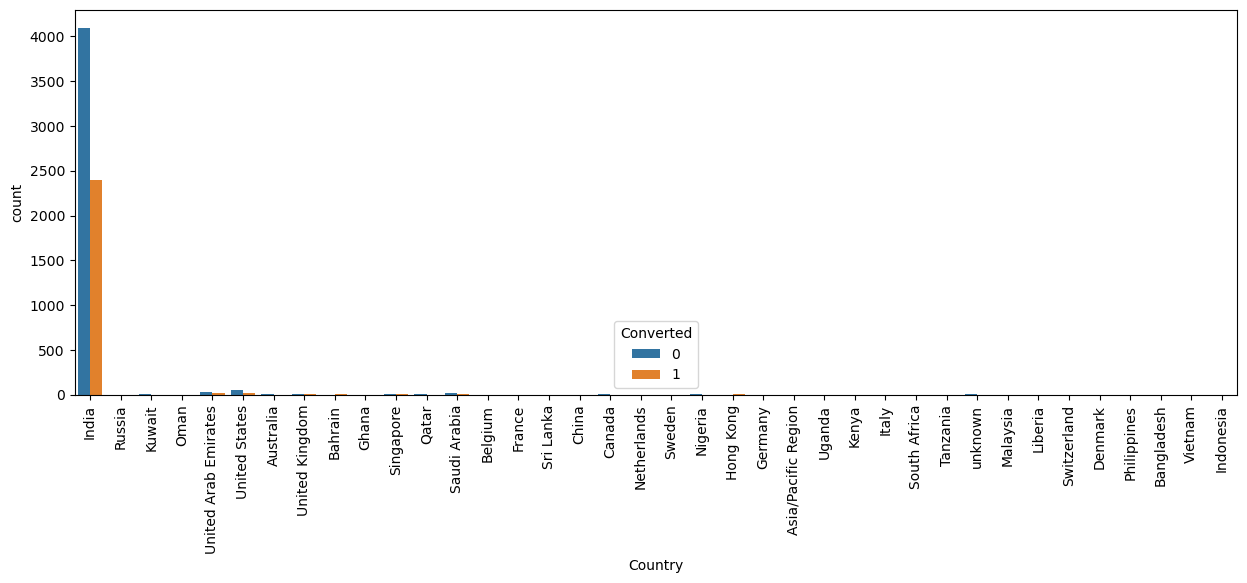

In [20]:
# Visualizing the country column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Country, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    As we can see that the no.of values for India is quite high so this columns can be dropped (since no variation)

In [21]:
leads.drop('Country',axis = 1, inplace = True)

In [22]:
# City column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
leads['City'].mode()[0]

'Mumbai'

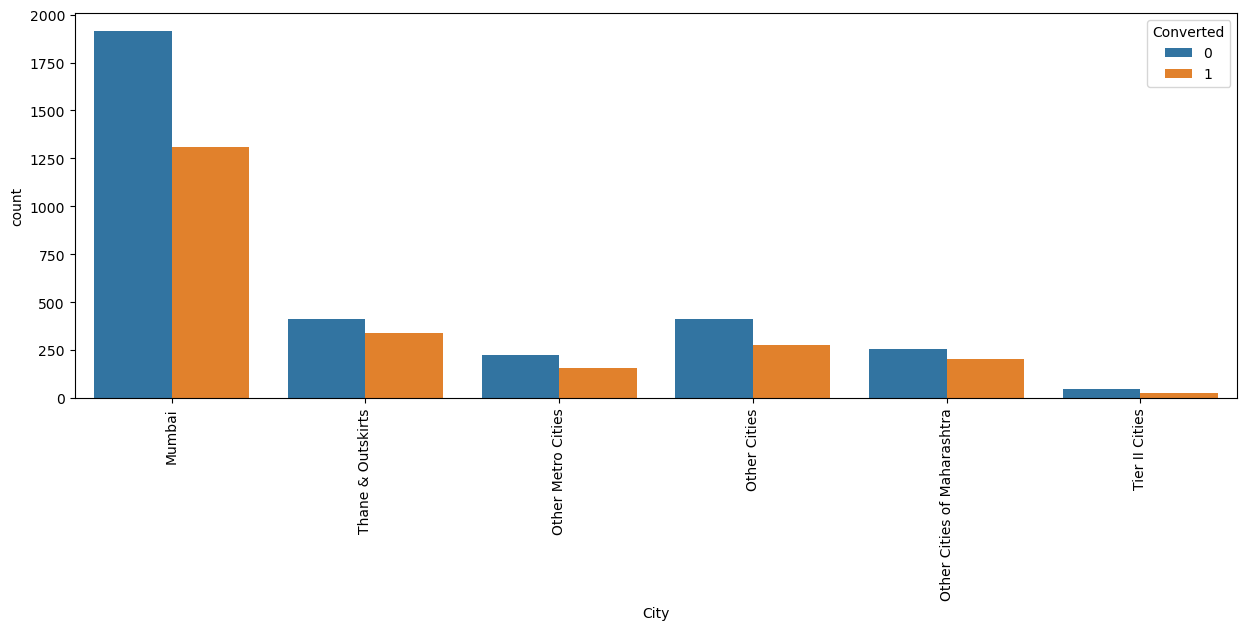

In [24]:
# Visualizing the country column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.City, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [25]:
# replacing the missing values in city column with mode i-e 'Mumbai'

leads['City'].replace(np.nan,leads['City'].mode()[0],inplace=True)

In [26]:
leads['City'].value_counts(normalize=True,dropna=False)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [28]:
# Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# replacing the missing values in Specialization column with 'Not Specified' as lead may not have 
# mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'].replace(np.nan,'Not Specified',inplace=True)

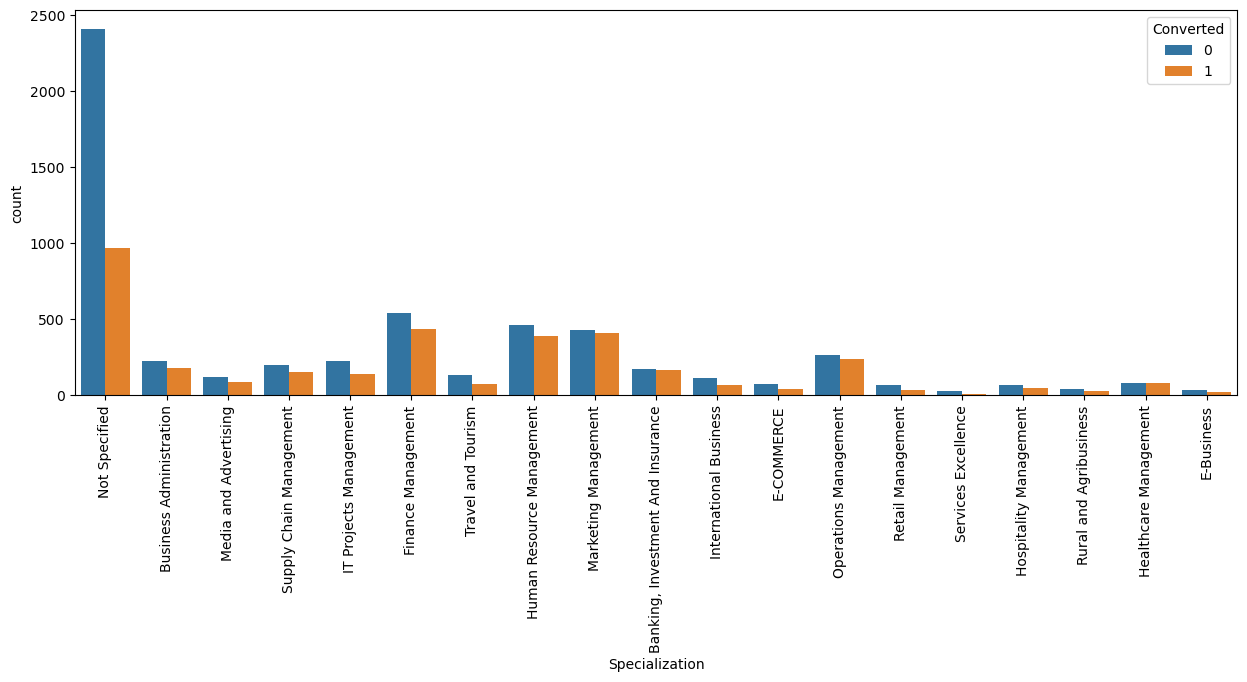

In [30]:
# Visualizing the Specialization column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Specialization, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    From above graph we see that specialization with Management  in  them  have higher number  of  leads as well as leads converted. So this is definitely a significant variable. 

In [31]:
# combining Management Specializations since they show similar trends and fall under the same category
leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                 'Operations Management','IT Projects Management','Supply Chain Management',
                                 'Healthcare Management','Hospitality Management','Retail Management'],
                                 'Management', inplace = True)  

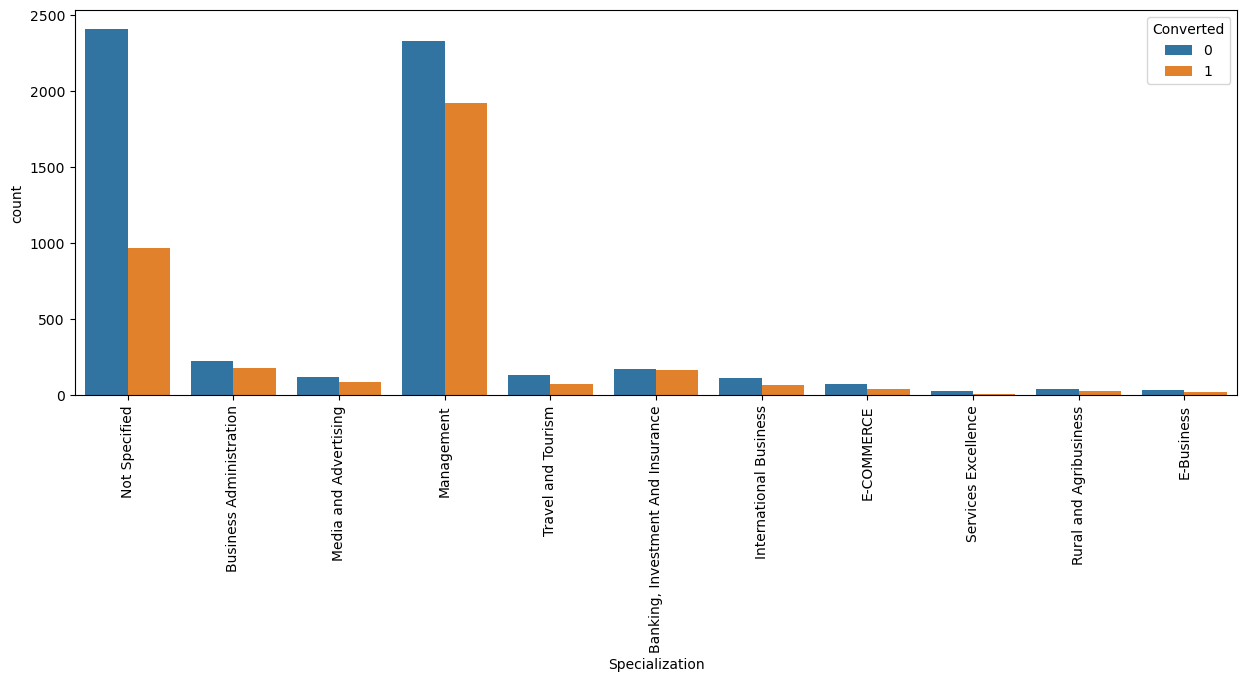

In [32]:
# Visualizing the Specialization column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Specialization, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [33]:
# What is your current occupation column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [35]:
# Replacing NaN values with mode "Unemployed"

leads['What is your current occupation'].replace(np.nan, 'Unemployed',inplace=True)

In [36]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

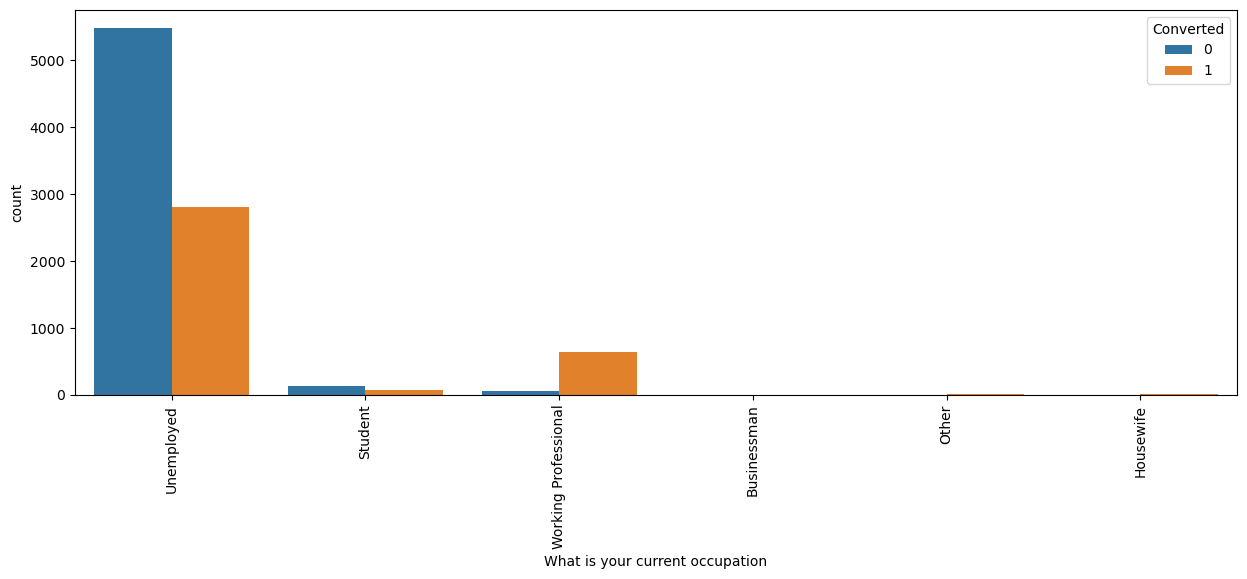

In [37]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['What is your current occupation'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    - Unemployed leads are the most in terms of absolute numbers.
    - Working Professionals have high chances of getting converted.


In [38]:
#checking What matters most to you in choosing a course counts

leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

    As  we  can  see  that  there  70%  of  the  values are  'Better Career Prospects' and 29% values are null so replacing null values with mode won't be meaningful so we drop the column

In [39]:
leads.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

In [40]:
#checking Tag column

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

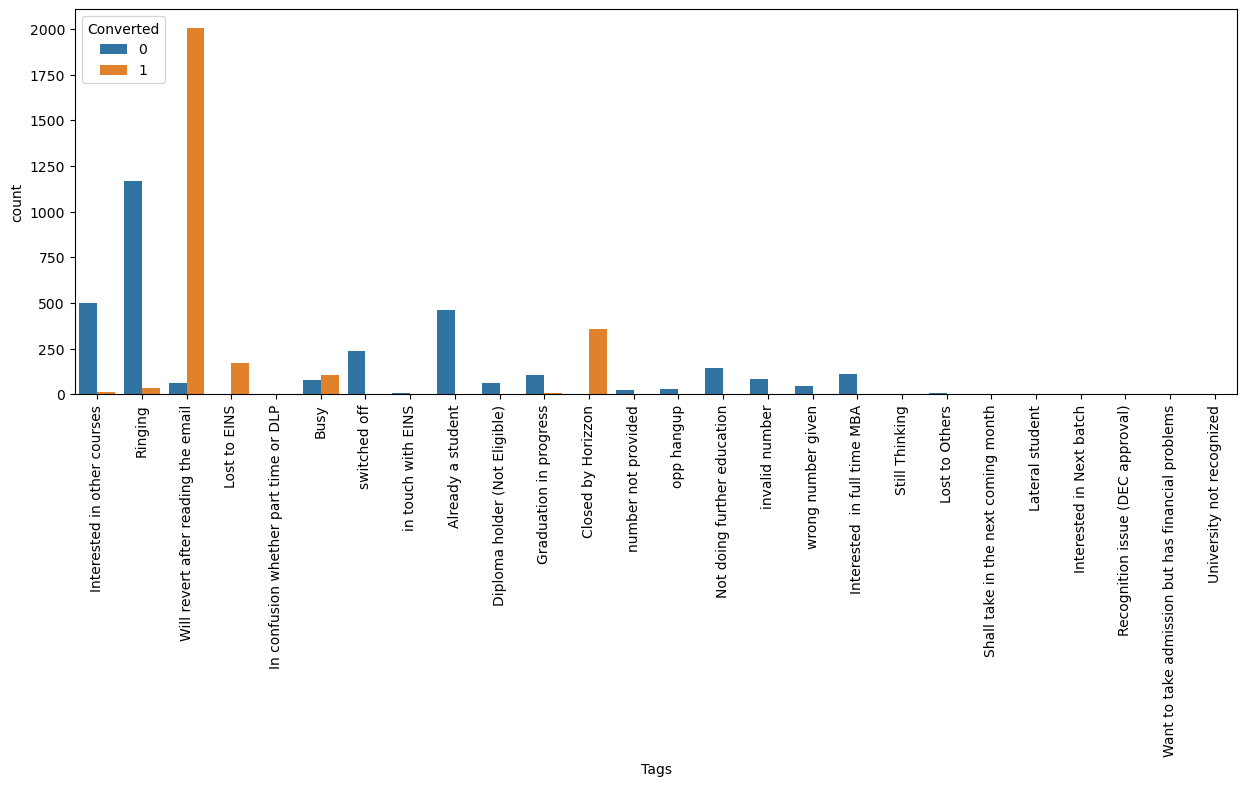

In [41]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Tags'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [42]:
leads['Tags'].replace(np.nan,leads['Tags'].mode()[0],inplace=True)

In [43]:
#checking percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [44]:
# checking Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
# replacing Nan Values with mode and combining low frequency values

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,leads['Lead Source'].mode()[0])

In [46]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

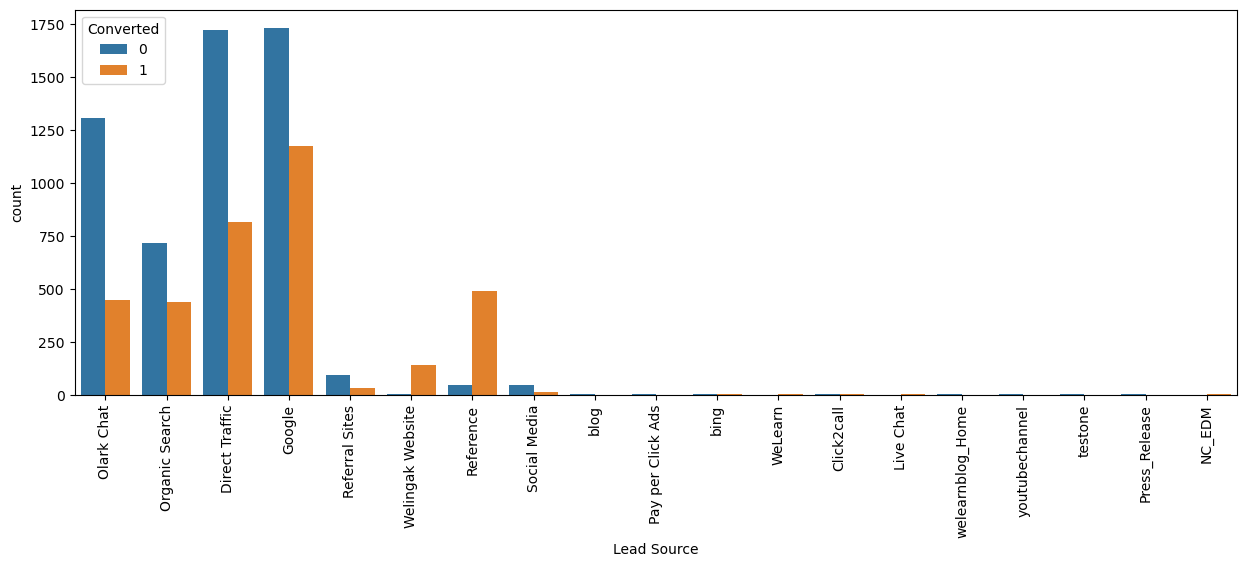

In [47]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Lead Source'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    Maximum number of leads are generated by Google and Direct traffic.
    Conversion Rate of 'Reference leads' and leads through 'Welingak website' is high.
    To improve overall lead conversion rate, focus should be on improving  lead converion of olark  chat,  organic  search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [48]:
# Checking Last Activity column

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [49]:
# replacing Nan Values with mode

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,leads['Last Activity'].mode()[0])

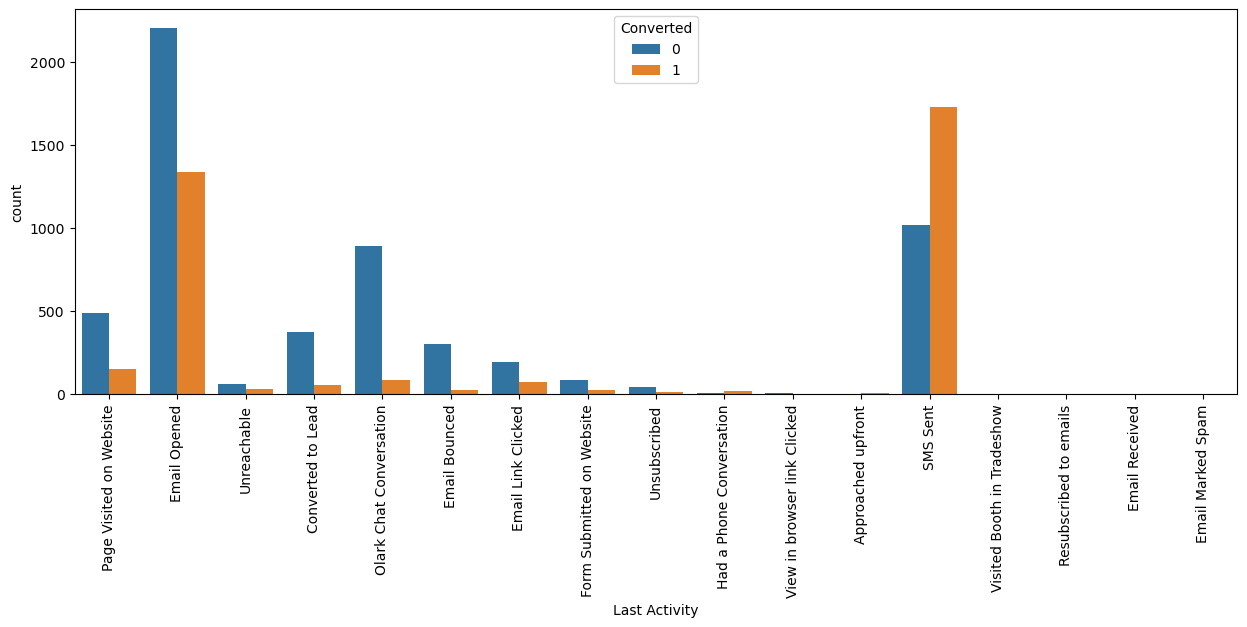

In [50]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Last Activity'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

### Analyzing remaining categorical features which do not contain null values

In [51]:
# Analyzing Lead Origin column

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

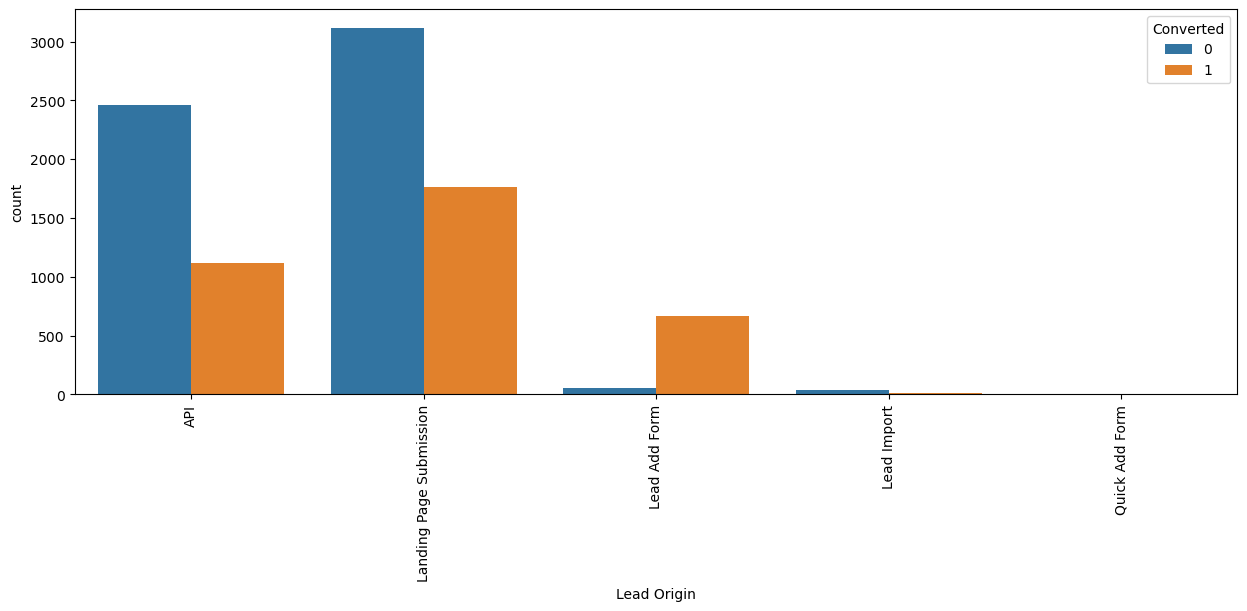

In [52]:
# Visualizing the Lead Origin column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Lead Origin'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    API and Landing Page Submission bring higher number of leads as well as conversion.
    Lead Add Form has a very high conversion rate but count of leads are not very high.
    Lead Import and Quick Add Form get very few leads.
    In order to improve overall lead conversion rate, we have  to  improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [54]:
# checking value counts for Do Not Call

leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [55]:
leads['Do Not Call'].value_counts(normalize = True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

    We can drop Do Not Call since > 90% is of only one Value

In [58]:
leads.drop(['Do Not Call'],axis=1,inplace=True)

### Checking the imbalanced variables that can be dropped

In [60]:
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [61]:
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [62]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [63]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [64]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [65]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [66]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [67]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [68]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [69]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [70]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [71]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [72]:
# adding imbalanced columns to the list of columns to be dropped

leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [73]:
# checking value counts of last Notable Activity

leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

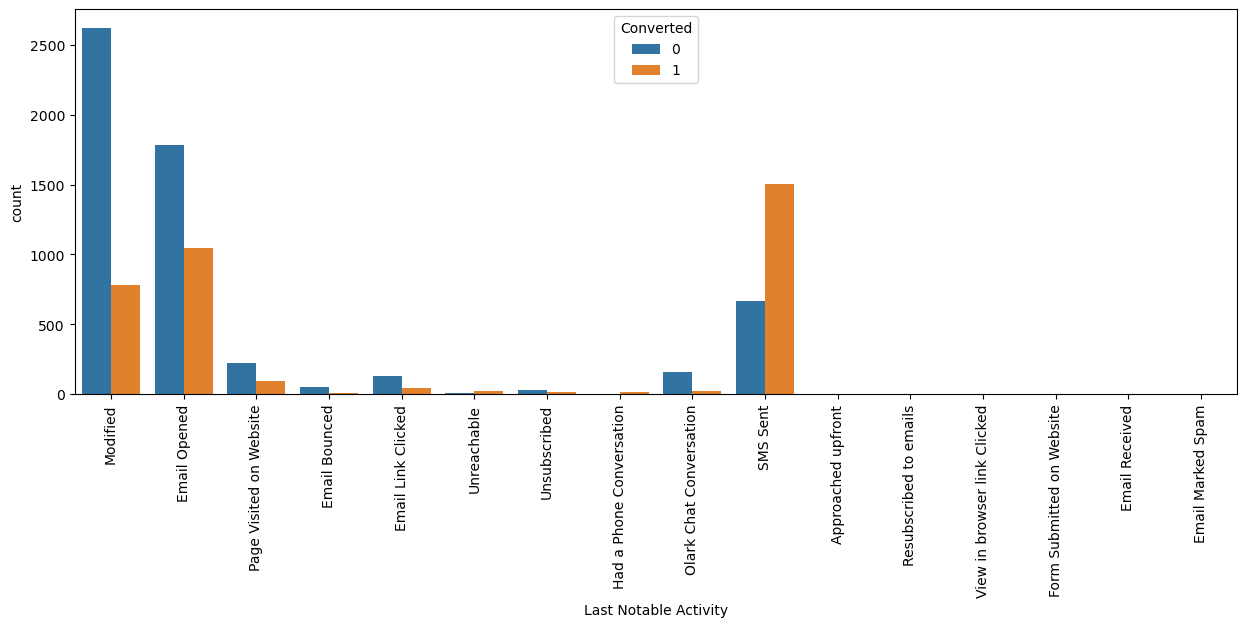

In [74]:
# Visualizing the Last Notable Activity column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Last Notable Activity'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    
    SMS Sent has high conversion rate.
    

In [75]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

### Numerical features

### Handling missing values

In [76]:
#Check the Null Values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [77]:
# Checking TotalVisits column

leads["TotalVisits"].isna().sum()

137

In [78]:
# Replacing the null values with mode

leads["TotalVisits"].replace(np.nan,leads["TotalVisits"].mode()[0],inplace=True)

In [79]:
leads["TotalVisits"].isna().sum()

0

In [80]:
# Checking Page Views Per Visit column

leads["Page Views Per Visit"].isna().sum()

137

In [81]:
leads["Page Views Per Visit"].replace(np.nan,leads["Page Views Per Visit"].mode()[0],inplace=True)

In [82]:
leads["Page Views Per Visit"].isna().sum()

0

In [83]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

    All missing values are handled 

In [84]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

### Handling outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x232bba6e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x232bba6e970>,
 'boxes': [<matplotlib.lines.Line2D at 0x232bba6e100>],
 'medians': [<matplotlib.lines.Line2D at 0x232bba6ef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x232bba7b220>],
 'means': []}

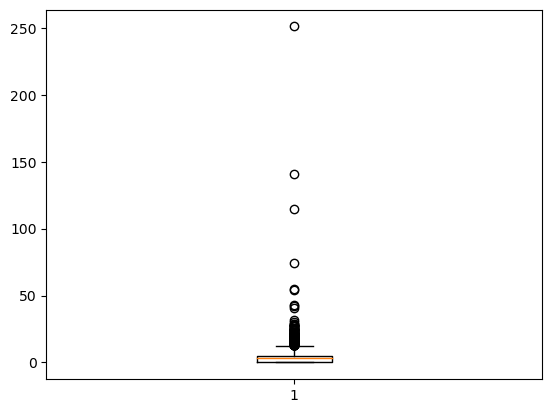

In [85]:
# 1. Total Visits columns

plt.boxplot(x=leads['TotalVisits'])

In [86]:
IQR1 = np.percentile(leads['TotalVisits'],75)-np.percentile(leads['TotalVisits'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['TotalVisits'],75)+1.5*IQR1
lower_threshold=np.percentile(leads['TotalVisits'],25)-1.5*IQR1

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper1=np.where([leads['TotalVisits']>upper_threshold])
lower1=np.where([leads['TotalVisits']<lower_threshold])

upper_threshold : 12.5
lower_threshold : -7.5


In [87]:
leads=leads.drop(leads[(leads['TotalVisits']>=upper_threshold)].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x232bbacf580>,
 'caps': [<matplotlib.lines.Line2D at 0x232bbacfb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x232bbacf2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x232bbadc100>],
 'fliers': [<matplotlib.lines.Line2D at 0x232bbadc3d0>],
 'means': []}

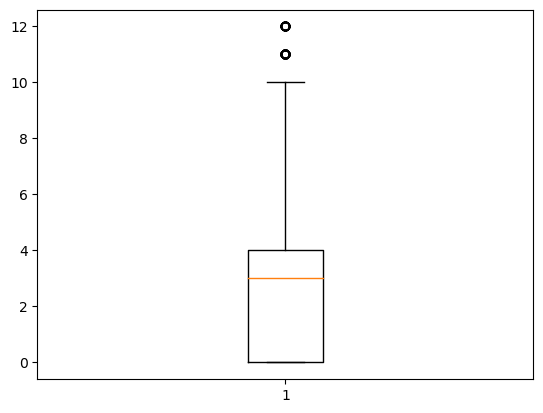

In [88]:
plt.boxplot(x=leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232bbaf7670>,
 'caps': [<matplotlib.lines.Line2D at 0x232bbaf7c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x232bbaf73a0>],
 'medians': [<matplotlib.lines.Line2D at 0x232bbb03220>],
 'fliers': [<matplotlib.lines.Line2D at 0x232bbb034f0>],
 'means': []}

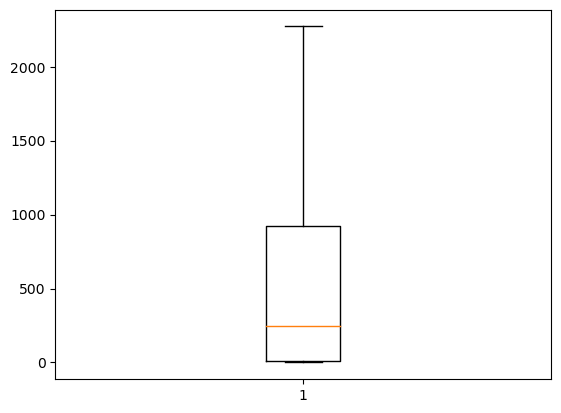

In [89]:
# 2. Total Time Spent on Website

plt.boxplot(x=leads['Total Time Spent on Website'])

    There are no outliers in the above column

In [90]:
IQR2 = np.percentile(leads['Total Time Spent on Website'],75)-np.percentile(leads['Total Time Spent on Website'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['Total Time Spent on Website'],75)+1.5*IQR2
lower_threshold=np.percentile(leads['Total Time Spent on Website'],25)-1.5*IQR2

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper2=np.where([leads['Total Time Spent on Website']>upper_threshold])

lower2=np.where([leads['Total Time Spent on Website']<lower_threshold])

upper_threshold : 2298.875
lower_threshold : -1368.125


{'whiskers': [<matplotlib.lines.Line2D at 0x232bbb51f40>,
 'caps': [<matplotlib.lines.Line2D at 0x232bbb61520>,
 'boxes': [<matplotlib.lines.Line2D at 0x232bbb51c70>],
 'medians': [<matplotlib.lines.Line2D at 0x232bbb61ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x232bbb61dc0>],
 'means': []}

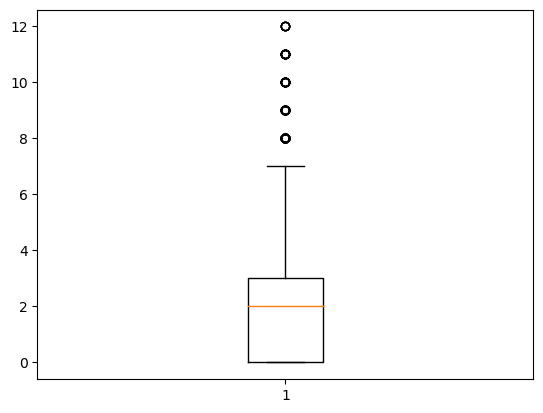

In [91]:
# 3. Page Views Per Visit on Website

plt.boxplot(x=leads['Page Views Per Visit'])

In [92]:
IQR3 = np.percentile(leads['Page Views Per Visit'],75)-np.percentile(leads['Page Views Per Visit'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['Page Views Per Visit'],75)+1.5*IQR3
lower_threshold=np.percentile(leads['Page Views Per Visit'],25)-1.5*IQR3

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper3=np.where([leads['Page Views Per Visit']>upper_threshold])
lower3=np.where([leads['Page Views Per Visit']<lower_threshold])


upper_threshold : 7.5
lower_threshold : -4.5


In [93]:
leads=leads.drop(leads[(leads['Page Views Per Visit']>upper_threshold)].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x232bbbc5250>,
 'caps': [<matplotlib.lines.Line2D at 0x232bbbc57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x232bbbb5f40>],
 'medians': [<matplotlib.lines.Line2D at 0x232bbbc5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x232bbbd30d0>],
 'means': []}

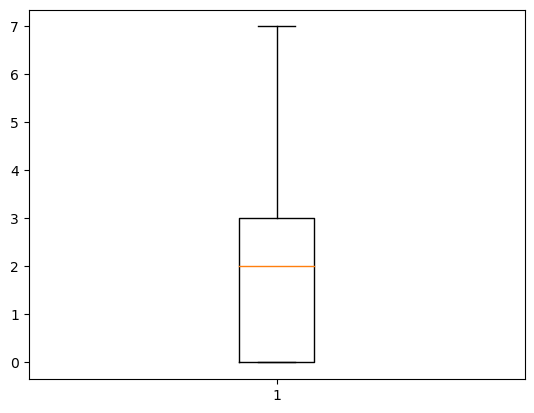

In [94]:
plt.boxplot(x=leads['Page Views Per Visit'])

In [95]:
leads.shape

(8844, 14)

    All the outliers are removed and null values are handled thus now the data is clean

### Analyzing numerical features

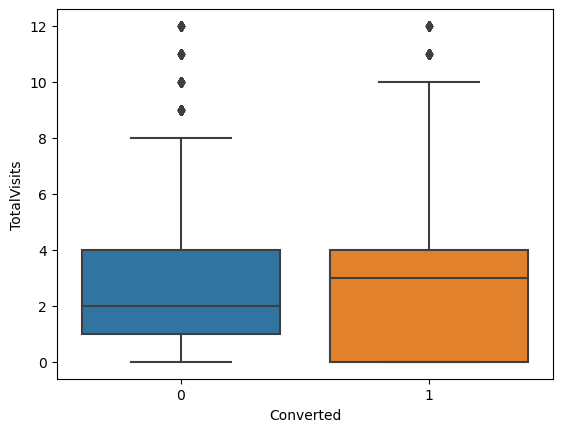

In [96]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

    Inference

    Median for converted and not converted leads are the close.
    Nothing conclusive can be said on the basis of Total Visits

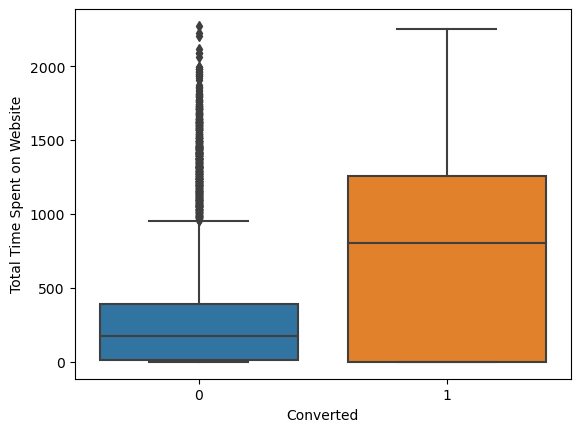

In [97]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

    Inference

    Leads spending more time on the website are more likely to be converted.
    Website should be made more engaging to make leads spend more time.

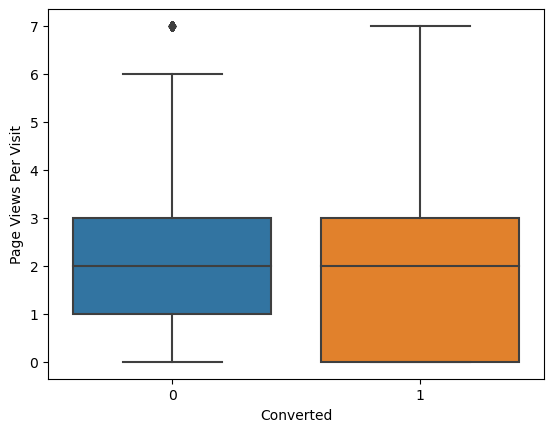

In [98]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

    Inference

    Median for converted and unconverted leads is the same.
    Nothing can be said specifically for lead conversion from Page Views Per Visit

In [99]:
leads.shape

(8844, 14)

In [100]:
leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [101]:
leads.info(())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8844 non-null   object 
 1   Lead Source                             8844 non-null   object 
 2   Do Not Email                            8844 non-null   object 
 3   Converted                               8844 non-null   int64  
 4   TotalVisits                             8844 non-null   float64
 5   Total Time Spent on Website             8844 non-null   int64  
 6   Page Views Per Visit                    8844 non-null   float64
 7   Last Activity                           8844 non-null   object 
 8   Specialization                          8844 non-null   object 
 9   What is your current occupation         8844 non-null   object 
 10  Tags                                    8844 non-null   obje

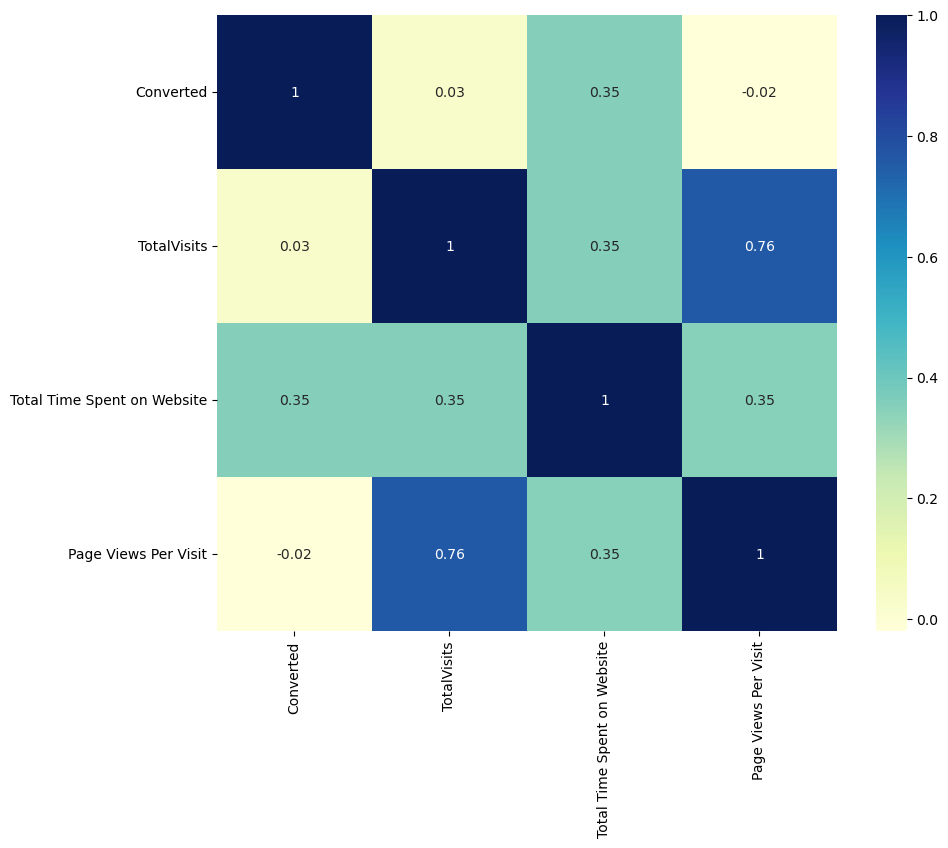

In [102]:
# Checking correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Creating dummy variables

In [103]:
cat_features=leads[['Tags','City','Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Do Not Email','A free copy of Mastering The Interview','Last Notable Activity']]

In [104]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(cat_features, drop_first=True)

In [105]:
dummy

,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management,Unemployed,...,0,0,0,0,0,0,1,0,0,0


In [107]:
leads= leads.drop(['Tags','City','Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Do Not Email','A free copy of Mastering The Interview','Last Notable Activity'], 1)
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [108]:
leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=104)

### Splitting the training and testing data

In [109]:
# Independent features

x=leads.drop('Converted',axis=1) 

In [110]:
# Dependent feature

y=leads['Converted']

In [111]:
# Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Scaling 

In [112]:
# Scaling numeric columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=x_train.select_dtypes(include=['float64', 'int64']).columns
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1167,-1.131923,-0.875193,-1.215815,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
147,0.844815,-0.077501,-0.257255,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6499,-0.341228,2.151236,-0.641827,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6151,1.240162,-0.018412,2.228112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5561,-1.131923,-0.875193,-1.215815,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Model building

In [113]:
import statsmodels.api as sm

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)                        # recursive feature elimination

In [115]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 73),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 60),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Diploma holder (Not Eligible)', False, 12),
 ('Tags_Graduation in progress', False, 17),
 ('Tags_In confusion whether part time or DLP', False, 31),
 ('Tags_Interested  in full time MBA', False, 6),
 ('Tags_Interested in Next batch', True, 1),
 ('Tags_Interested in other courses', False, 13),
 ('Tags_Lateral student', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Lost to Others', False, 66),
 ('Tags_Not doing further education', True, 1),
 ('Tags_Recognition issue (DEC approval)', False, 70),
 ('Tags_Ringing', True, 1),
 ('Tags_Shall take in the next coming month', False, 62),
 ('Tags_Still Thinking', False, 54),
 ('Tags_University not recognized', False, 87),
 ('Tags_Want to take admission but has financial problems', False, 61),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_in touc

In [116]:
#list of RFE supported columns

col = x_train.columns[rfe.support_]
col

Index(['Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Do Not Email_Yes',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [117]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to Others', 'Tags_Recognition issue (DEC approval)',
       'Tags_Shall take in the next coming month', 'Tags_Still Thinking',
       'Tags_University not recognized',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup',
       'Tags_wrong number given', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'L

In [118]:
#BUILDING MODEL #1

x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6617
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.4
Date:                Fri, 27 Jan 2023   Deviance:                       4324.8
Time:                        12:21:04   Pearson chi2:                 1.01e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4917
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0735      0.225     -9.203      0.000      -2.515      -1.632
Tags_Busy                                          3.3564      0.314     10.680      0.000       2.740       3.972
Tags_Closed by Horizzon                           29.8927   1.92e+04      0.002      0.999   -3.75e+04    3.76e+04
Tags_Interested in Next batch                     28.6171   1.48e+05      0.000      1.000    -2.9e+05     2.9e+05
Tags_Lateral student                              29.9612   1.94e+05      0.000      1.000   -3.81e+05    3.81e+05
Tags_Lost to EINS                                  7.8186      0.556     14.070      0.000       6.730       8.908
Tags_Not doing further education                 -22.6632   3.18e+04     -0.001      0.999   -6.24e+04    6.23e+04
Tags_Ringing                                      -0.8314      0.315     -2.640      0.008      -1.449      -0.214
Tags_Will revert after reading the email           3.8011      0.215     17.650      0.000       3.379       4.223
Tags_switched off                                 -1.2604      0.629     -2.003      0.045      -2.494      -0.027
Lead Origin_Lead Add Form                          2.4915      0.238     10.483      0.000       2.026       2.957
Lead Source_Welingak Website                       1.5814      0.765      2.067      0.039       0.082       3.081
What is your current occupation_Unemployed        -2.5277      0.176    -14.401      0.000      -2.872      -2.184
Do Not Email_Yes                                  -1.4820      0.178     -8.341      0.000      -1.830      -1.134
Last Notable Activity_Had a Phone Conversation     2.6071      1.079      2.417      0.016       0.493       4.722
Last Notable Activity_SMS Sent                     2.8040      0.109     25.625      0.000       2.590       3.018
==================================================================================================================
"""

In [120]:
#dropping column with high p-value

col = col.drop('Tags_Interested in Next batch',1)

In [121]:
#BUILDING MODEL #2

x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6618
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.6
Date:                Fri, 27 Jan 2023   Deviance:                       4343.2
Time:                        12:22:16   Pearson chi2:                 9.96e+03
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4903
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9650      0.215     -9.158      0.000      -2.385      -1.544
Tags_Busy                                          3.1888      0.305     10.449      0.000       2.591       3.787
Tags_Closed by Horizzon                           29.7415   1.92e+04      0.002      0.999   -3.75e+04    3.76e+04
Tags_Lateral student                              29.8048   1.94e+05      0.000      1.000    -3.8e+05     3.8e+05
Tags_Lost to EINS                                  7.6652      0.550     13.929      0.000       6.587       8.744
Tags_Not doing further education                 -22.7958   3.19e+04     -0.001      0.999   -6.25e+04    6.24e+04
Tags_Ringing                                      -1.0118      0.305     -3.318      0.001      -1.609      -0.414
Tags_Will revert after reading the email           3.6455      0.201     18.110      0.000       3.251       4.040
Tags_switched off                                 -1.4404      0.625     -2.306      0.021      -2.664      -0.216
Lead Origin_Lead Add Form                          2.4992      0.236     10.579      0.000       2.036       2.962
Lead Source_Welingak Website                       1.5696      0.764      2.053      0.040       0.071       3.068
What is your current occupation_Unemployed        -2.4843      0.172    -14.465      0.000      -2.821      -2.148
Do Not Email_Yes                                  -1.4584      0.177     -8.251      0.000      -1.805      -1.112
Last Notable Activity_Had a Phone Conversation     2.6113      1.079      2.421      0.015       0.497       4.726
Last Notable Activity_SMS Sent                     2.8351      0.110     25.839      0.000       2.620       3.050
==================================================================================================================
"""

In [122]:
#dropping column with high p-value

col = col.drop('Tags_Lateral student',1)

In [123]:
#BUILDING MODEL #3

x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6619
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2176.4
Date:                Fri, 27 Jan 2023   Deviance:                       4352.8
Time:                        12:22:53   Pearson chi2:                 9.97e+03
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4896
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9305      0.211     -9.128      0.000      -2.345      -1.516
Tags_Busy                                          3.1402      0.302     10.381      0.000       2.547       3.733
Tags_Closed by Horizzon                           29.6911   1.91e+04      0.002      0.999   -3.75e+04    3.76e+04
Tags_Lost to EINS                                  7.6162      0.549     13.877      0.000       6.541       8.692
Tags_Not doing further education                 -22.8429   3.19e+04     -0.001      0.999   -6.25e+04    6.24e+04
Tags_Ringing                                      -1.0619      0.302     -3.516      0.000      -1.654      -0.470
Tags_Will revert after reading the email           3.5970      0.197     18.231      0.000       3.210       3.984
Tags_switched off                                 -1.4882      0.623     -2.388      0.017      -2.710      -0.267
Lead Origin_Lead Add Form                          2.5121      0.236     10.666      0.000       2.050       2.974
Lead Source_Welingak Website                       1.5565      0.764      2.037      0.042       0.059       3.054
What is your current occupation_Unemployed        -2.4697      0.171    -14.479      0.000      -2.804      -2.135
Do Not Email_Yes                                  -1.4598      0.177     -8.263      0.000      -1.806      -1.114
Last Notable Activity_Had a Phone Conversation     2.6110      1.079      2.420      0.015       0.497       4.725
Last Notable Activity_SMS Sent                     2.8341      0.110     25.878      0.000       2.619       3.049
==================================================================================================================
"""

In [124]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [125]:
#BUILDING MODEL #4

x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6620
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Fri, 27 Jan 2023   Deviance:                       5080.1
Time:                        12:23:24   Pearson chi2:                 1.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4304
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3340      0.133     -2.521      0.012      -0.594      -0.074
Tags_Busy                                          1.2209      0.246      4.959      0.000       0.738       1.704
Tags_Lost to EINS                                  5.6010      0.522     10.739      0.000       4.579       6.623
Tags_Not doing further education                 -23.3575    1.2e+04     -0.002      0.998   -2.34e+04    2.34e+04
Tags_Ringing                                      -3.0883      0.264    -11.689      0.000      -3.606      -2.570
Tags_Will revert after reading the email           1.6147      0.101     15.947      0.000       1.416       1.813
Tags_switched off                                 -3.2972      0.601     -5.488      0.000      -4.475      -2.120
Lead Origin_Lead Add Form                          3.6563      0.207     17.693      0.000       3.251       4.061
Lead Source_Welingak Website                       1.3669      0.752      1.818      0.069      -0.107       2.840
What is your current occupation_Unemployed        -2.0445      0.131    -15.635      0.000      -2.301      -1.788
Do Not Email_Yes                                  -1.5818      0.173     -9.153      0.000      -1.921      -1.243
Last Notable Activity_Had a Phone Conversation     2.5798      1.078      2.394      0.017       0.468       4.692
Last Notable Activity_SMS Sent                     2.6090      0.101     25.906      0.000       2.412       2.806
==================================================================================================================
"""

In [126]:
#dropping column with high p-value

col = col.drop('Tags_Not doing further education',1)

In [127]:
#BUILDING MODEL #5

x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6621
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.8
Date:                Fri, 27 Jan 2023   Deviance:                       5101.6
Time:                        12:23:55   Pearson chi2:                 1.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4286
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3925      0.132     -2.975      0.003      -0.651      -0.134
Tags_Busy                                          1.2789      0.246      5.197      0.000       0.797       1.761
Tags_Lost to EINS                                  5.6625      0.522     10.857      0.000       4.640       6.685
Tags_Ringing                                      -3.0353      0.264    -11.495      0.000      -3.553      -2.518
Tags_Will revert after reading the email           1.6741      0.100     16.664      0.000       1.477       1.871
Tags_switched off                                 -3.2428      0.601     -5.398      0.000      -4.420      -2.065
Lead Origin_Lead Add Form                          3.6600      0.204     17.898      0.000       3.259       4.061
Lead Source_Welingak Website                       1.4017      0.752      1.865      0.062      -0.072       2.875
What is your current occupation_Unemployed        -2.0450      0.130    -15.687      0.000      -2.301      -1.790
Do Not Email_Yes                                  -1.6166      0.172     -9.421      0.000      -1.953      -1.280
Last Notable Activity_Had a Phone Conversation     2.5794      1.078      2.394      0.017       0.467       4.692
Last Notable Activity_SMS Sent                     2.6165      0.101     25.946      0.000       2.419       2.814
==================================================================================================================
"""

In [128]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [129]:
#BUILDING MODEL #6

x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6633
Model:                            GLM   Df Residuals:                     6622
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.3
Date:                Fri, 27 Jan 2023   Deviance:                       5106.5
Time:                        12:24:26   Pearson chi2:                 1.11e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4282
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3986      0.132     -3.019      0.003      -0.657      -0.140
Tags_Busy                                          1.2793      0.246      5.198      0.000       0.797       1.762
Tags_Lost to EINS                                  5.6640      0.522     10.861      0.000       4.642       6.686
Tags_Ringing                                      -3.0661      0.266    -11.508      0.000      -3.588      -2.544
Tags_Will revert after reading the email           1.6766      0.100     16.711      0.000       1.480       1.873
Tags_switched off                                 -3.2417      0.601     -5.397      0.000      -4.419      -2.064
Lead Origin_Lead Add Form                          3.8257      0.195     19.584      0.000       3.443       4.209
What is your current occupation_Unemployed        -2.0401      0.131    -15.625      0.000      -2.296      -1.784
Do Not Email_Yes                                  -1.6140      0.171     -9.429      0.000      -1.949      -1.278
Last Notable Activity_Had a Phone Conversation     2.5782      1.078      2.393      0.017       0.466       4.690
Last Notable Activity_SMS Sent                     2.6165      0.101     25.945      0.000       2.419       2.814
==================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [130]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_switched off,1.13
0,Tags_Busy,1.10
1,Tags_Lost to EINS,1.06
8,Last Notable Activity_Had a Phone Conversation,1.00
2,Tags_Ringing,0.13
5,Lead Origin_Lead Add Form,0.08
3,Tags_Will revert after reading the email,0.06
6,What is your current occupation_Unemployed,0.04
7,Do Not Email_Yes,0.03
9,Last Notable Activity_SMS Sent,0.01


In [132]:
# Since all VIF is less than equal to 10 so there is no multicollinearity
# So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

### Model Evaluation

In [133]:
# Getting the Predicted values on the train set
# Assigning the columns selected by the final model to the x_test 

x_test = x_test[col]
x_test.head()

,Tags_Busy,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Origin_Lead Add Form,What is your current occupation_Unemployed,Do Not Email_Yes,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
94,0,0,0,0,0,0,1,0,0,0
5083,0,0,0,1,0,0,1,0,0,0
7564,0,0,0,1,0,0,1,0,0,1
4913,0,0,0,1,0,0,0,0,0,1
7271,0,0,1,0,0,0,1,0,0,1


In [134]:
# Adding a const
x_test_sm = sm.add_constant(x_test)

# Making predictions on the test set
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

94      0.080269
5083    0.318193
7564    0.864649
4913    0.980054
7271    0.052735
7265    0.864649
4481    0.955366
3899    0.318193
2163    0.996599
6404    0.192146
dtype: float64

In [135]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.08026875, 0.31819332, 0.86464898, 0.98005382, 0.05273503,
       0.86464898, 0.95536579, 0.31819332, 0.9965985 , 0.19214635])

In [136]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final ['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.080269,94
1,0,0.318193,5083
2,0,0.864649,7564
3,1,0.980054,4913
4,0,0.052735,7271


In [137]:
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.080269,94,0
1,0,0.318193,5083,0
2,0,0.864649,7564,1
3,1,0.980054,4913,1
4,0,0.052735,7271,0


In [138]:
from sklearn import metrics

In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

0.8326549072817729


In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

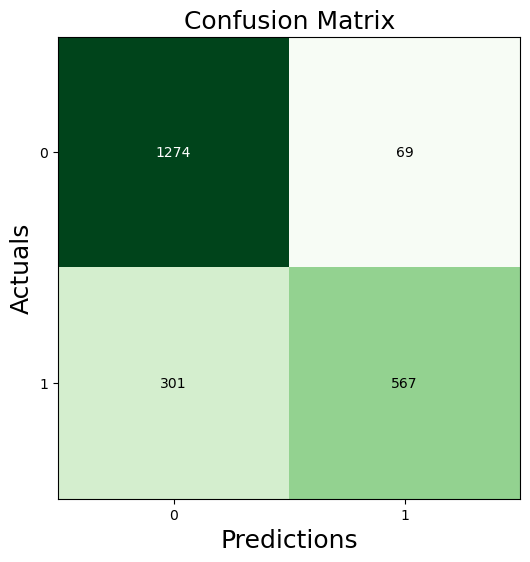

In [141]:
cm = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [142]:
# Substituting the value of true positive
TP = cm[1,1]
# Substituting the value of true negatives
TN = cm[0,0]
# Substituting the value of false positives
FP = cm[0,1] 
# Substituting the value of false negatives
FN = cm[1,0]

In [143]:
# Precision

print("Precision : ",TP / (TP + FP))

Precision :  0.8915094339622641


In [144]:
# Recall or Sensitivity

print("Recall : ",TP / (TP+ FN))

Recall :  0.6532258064516129


In [145]:
# Specificity

print("Specificity :",TN / (TN+FP))

Specificity : 0.9486224869694714


In [149]:
accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)

0.8326549072817729

In [153]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Converted,y_test_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1343
           1       0.89      0.65      0.75       868

    accuracy                           0.83      2211
   macro avg       0.85      0.80      0.81      2211
weighted avg       0.84      0.83      0.83      2211



### Plotting ROC curve

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Converted_prob, drop_intermediate = False )

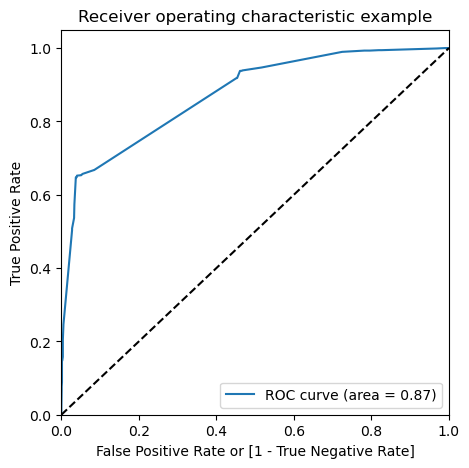

In [164]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

Since we have higher (0.87) area under the ROC curve , therefore our model is a good one.

### Assigining lead score to the customers

In [154]:
y_pred_final = y_test_pred_final.copy()
y_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,Lead_Score
0,0,0.080269,94,0,8
1,0,0.318193,5083,0,32
2,0,0.864649,7564,1,86
3,1,0.980054,4913,1,98
4,0,0.052735,7271,0,5


### Finding out the leads which should be contacted (Hot leads)

In [156]:
hl = y_pred_final.copy()
bins = [0,10,20,30,40,50,60,70,80,90,100]
ranges = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
hl['Lead_Score'] = pd.cut(hl['Lead_Score'],bins,labels=ranges)
hl.groupby(['Lead_Score']).size()

Lead_Score
0-10      531
10-20       9
20-30      29
30-40     761
40-50       7
50-60      21
60-70       0
70-80     103
80-90     292
90-100    220
dtype: int64

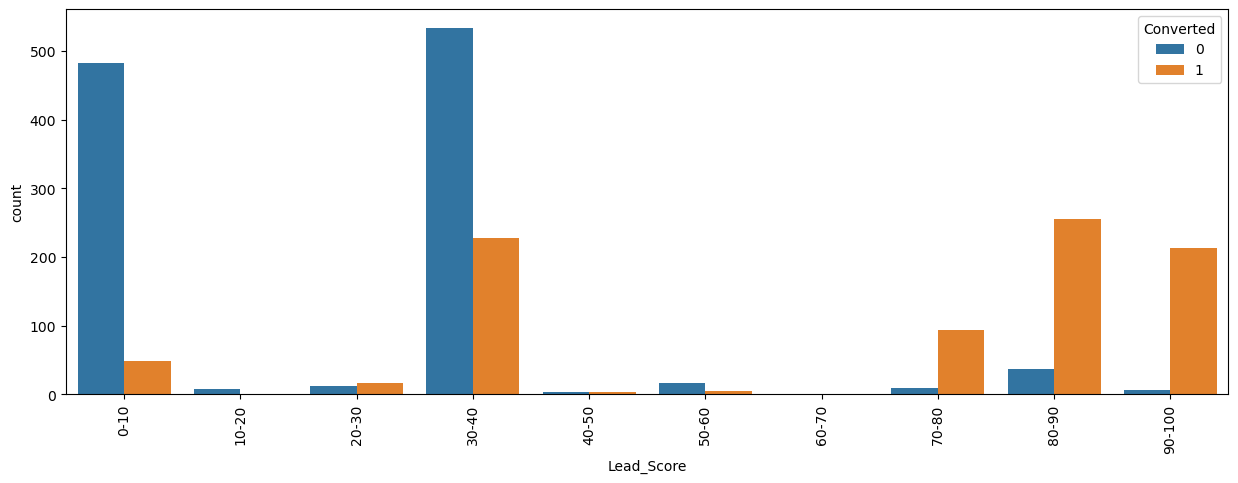

In [157]:
plt.figure(figsize=(15,5))
g1 = sns.countplot(hl['Lead_Score'], hue = hl.Converted)
plt.xticks(rotation=90)
plt.show()

    From the above graph we can conclude the following:
    
    The customers which should be contacted are the customers whose "Lead Score"  is  equal  to or greater than 80 as they  have a high probability of getting converted. 
    So, they can be termed as 'Hot Leads'.

In [159]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,Lead_Score
2,0,0.864649,7564,1,86
3,1,0.980054,4913,1,98
5,1,0.864649,7265,1,86
6,1,0.955366,4481,1,96
8,1,0.996599,2163,1,100
10,1,0.996599,6729,1,100
16,1,0.980054,2943,1,98
18,1,0.993963,6884,1,99
22,1,0.864649,1447,1,86
23,1,0.983146,3945,1,98


In [160]:
hot_leads.shape

(543, 5)

    So there are 543 leads which can be contacted and have a high chance of getting converted. 
    The Prospect ID of the customers to be contacted are given in the table.